#Proyek Analisis Data: E-commerce-public-dataset

•	**Nama:** Muhammad Maulana Syarif

•	**Email:** Maulanaballrace23@gmail.com

•	**ID Dicoding:** maulana_syarif

##Menentukan Pertanyaan Bisnis

- Produk apa yang menjadi top penjualan pada e comerce dan berapa persen penjualannya ?
- Bagaimana hubungan antar berbagai fitur transaksi, seperti harga, skor ulasan, waktu pengiriman, nilai pembayaran, dan faktor waktu (jam dan bulan), dalam mempengaruhi perilaku pembelian dan pengeluaran pelanggan ?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
import folium
import os
from google.colab import drive
import zipfile


In [ ]:
print(os.listdir('/content/E-commerce-public-dataset/E-Commerce Public Dataset'))
for root, dirs, files in os.walk('/content/E-commerce-public-dataset'):
    for file in files:
        print(os.path.join(root, file))

['product_category_name_translation.csv', 'sellers_dataset.csv', 'products_dataset.csv', 'customers_dataset.csv', 'order_reviews_dataset.csv', 'orders_dataset.csv', 'order_payments_dataset.csv', 'geolocation_dataset.csv', 'New Text Document.txt', 'order_items_dataset.csv']
/content/E-commerce-public-dataset/E-Commerce Public Dataset/product_category_name_translation.csv
/content/E-commerce-public-dataset/E-Commerce Public Dataset/sellers_dataset.csv
/content/E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv
/content/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv
/content/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv
/content/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv
/content/E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv
/content/E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv
/content/E-commerce-public-dataset/E-Comm

##Data Wrangling

###Gathering Data

In [ ]:
zip_file = '/content/E-commerce-public-dataset.zip'
extract_path = '/content/E-commerce-public-dataset'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
os.listdir(extract_path)

['E-Commerce Public Dataset']

####Customer Dataset

In [ ]:
customer = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv')
print (customer.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


####Geolocation Dataset

In [ ]:
geolocation = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv')
print (geolocation.head())

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


####Order Item Dataset

In [ ]:
order_item = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv')
print (order_item.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

####Order Payment Dataset

In [ ]:
order_payment = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv')
print (order_payment.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


####Order Review Dataset

In [ ]:
order_review = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv')
print (order_review.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

####Order Dataset

In [ ]:
order = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv')
print (order.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

####Product Category Dataset

In [ ]:
product_category = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/product_category_name_translation.csv')
print (product_category.head())

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


####Product Dataset

In [ ]:
product = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv')
print (product.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

####Seller Dataset

In [ ]:
seller = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/sellers_dataset.csv')
print (seller.head())
print(product['product_id'])

                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  
0        1e9e8ef04dbcff4541ed26657ea517e5
1        3aa071139cb16b67ca9e5dea641aaa2f
2        96bd76ec8810374ed1b65e291975717f
3        cef67bcfe19066a932b7673e239eb23d
4        9dc1a7de274444849c219cff195d0b71
                       ...               
32946    a0b7d5a992ccda646f2d34e418fff5a0
32947    bf4538d88321d0fd4412a93c974510e6
32948    9a7c6041fa9592d9d9ef6cfe62a71f8c
32949    83808703fc0706a22e

###Assesing Data

####Customer Datset

In [ ]:
print(customer.shape)
print(customer.info())
print(customer.describe())
print(customer.isnull().sum())
print(customer.isnull().mean())

(99441, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int

####Geolocation Dataset

In [ ]:
print(geolocation.shape)
print(geolocation.info())
print(geolocation.describe())
print(geolocation.isnull().sum())
print(geolocation.isnull().mean())

(1000163, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.3

####Order Items Dataset

In [ ]:
print(order_item.shape)
print(order_item.info())
print(order_item.describe())
print(order_item.isnull().sum())
print(order_item.isnull().mean())

(112650, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.26

####Order Payment Dataset

In [ ]:
print(order_payment.shape)
print(order_payment.info())
print(order_payment.describe())
print(order_payment.isnull().sum())
print(order_payment.isnull().mean())

(103886, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%   

####Order Reviews Dataset

In [ ]:
print(order_review.shape)
print(order_review.info())
print(order_review.describe())
print(order_review.isnull().sum())
print(order_review.isnull().mean())

(99224, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
revi

####Order Dataset

In [ ]:
print(order.shape)
print(order.info())
print(order.describe())
print(order.isnull().sum())
print(order.isnull().mean())

(99441, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481

####Product Category Dataset

In [ ]:
print(product_category.shape)
print(product_category.info())
print(product_category.describe())
print(product_category.isnull().sum())
print(product_category.isnull().mean())

(71, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1
product_category_name            0
product_category_name_english    0
dtype: int64
product_category_name            0.0
product_category_name_english    0.0
dtype: float64


####Product Dataset

In [ ]:
print(product.shape)
print(product.info())
print(product.describe())
print(product.isnull().sum())
print(product.isnull().mean())
print(product['product_id'])

(32951, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949               

####Seller Dataset

In [ ]:
print(seller.shape)
print(seller.info())
print(seller.describe())
print(seller.isnull().sum())
print(seller.isnull().mean())

(3095, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
d

###Cleaning Data

####Merging Dataframe

In [ ]:
# Make sure to load the 'order' DataFrame before using it:
df = pd.read_csv ('/content/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv')
order_item = pd.read_csv('/content/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv')
order_payment = pd.read_csv('/content/E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv')
order_review = pd.read_csv('/content/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv')
product = pd.read_csv('/content/E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv')
customer = pd.read_csv('/content/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv')
seller = pd.read_csv('/content/E-commerce-public-dataset/E-Commerce Public Dataset/sellers_dataset.csv')
#Now proceed with the merge operations:
df = order.merge(order_item, on='order_id', how='inner')
df = df.merge(order_payment, on='order_id', how='inner', validate='m:m')
df = df.merge(order_review, on='order_id', how='inner')
df = df.merge(product, on='product_id', how='inner')
df = df.merge(customer, on='customer_id', how='inner')
df = df.merge(seller, on='seller_id', how='inner')

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP


In [ ]:
df.shape

(117329, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

##Exploratory Data Analysis (EDA)

### Visualization & Explanatory Analysis


####Pertanyaan 1 Produk apa yang menjadi top penjualan pada e comerce dan berapa persen penjualannya ?

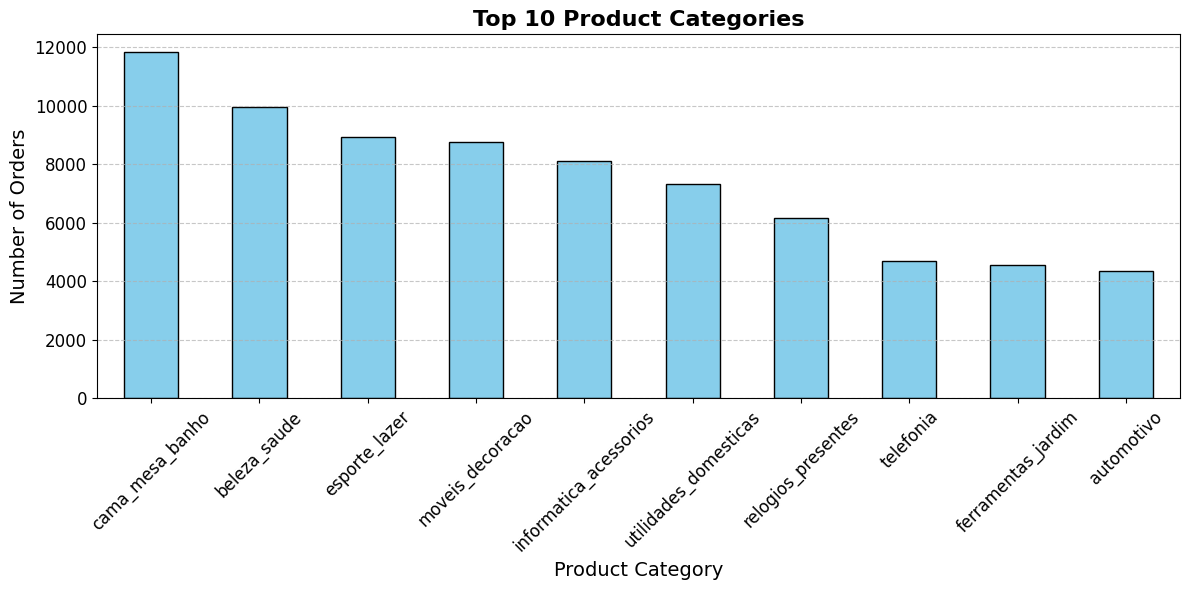

In [ ]:
plt.figure(figsize=(12, 6))
top_categories = df['product_category_name'].value_counts().head(10)
colors = ['skyblue']
top_categories.plot(kind='bar', color=colors[0], edgecolor='black')
plt.title('Top 10 Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-42-6d4bd62f1dc1>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', num_colors).colors


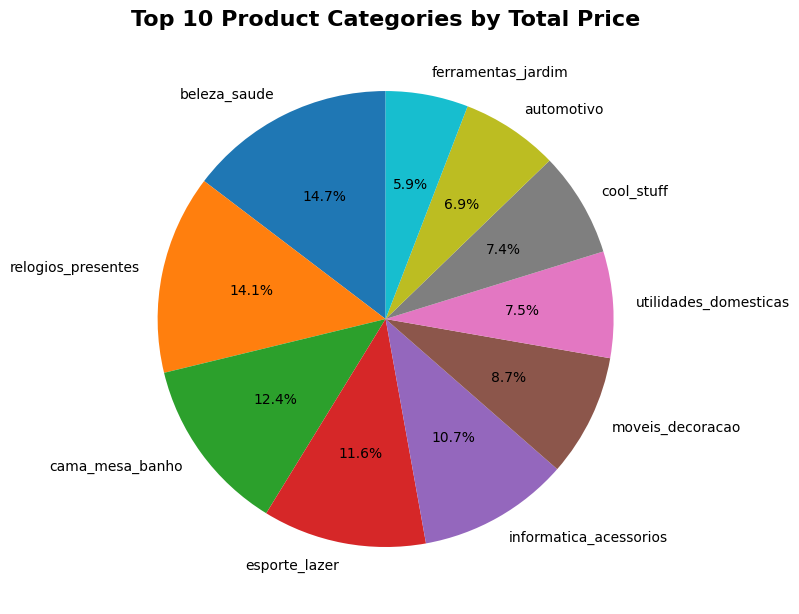

In [ ]:
num_colors = 10
colors = cm.get_cmap('tab10', num_colors).colors
plt.figure(figsize=(8, 8))
top_categories = df.groupby('product_category_name')['price'].sum()
top_categories = top_categories.nlargest(10)
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Top 10 Product Categories by Total Price', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

####Pertanyaan 2 Bagaimana hubungan antar berbagai fitur transaksi, seperti harga, skor ulasan, waktu pengiriman, nilai pembayaran, dan faktor waktu (jam dan bulan), dalam mempengaruhi perilaku pembelian dan pengeluaran pelanggan

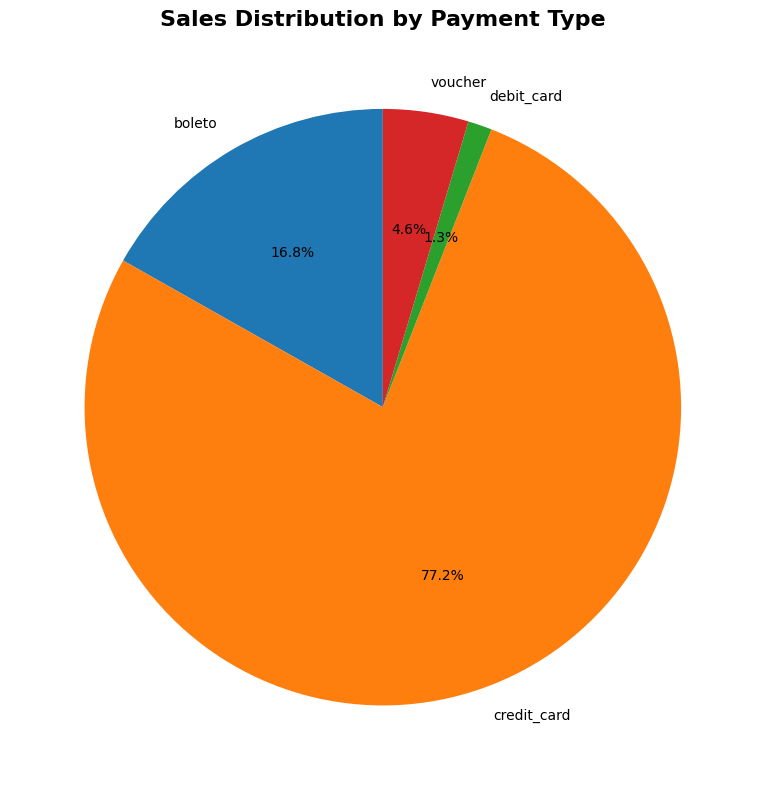

In [ ]:
plt.figure(figsize=(8, 8))
sales_by_payment = df.groupby('payment_type')['price'].sum()
sales_by_payment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sales Distribution by Payment Type', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

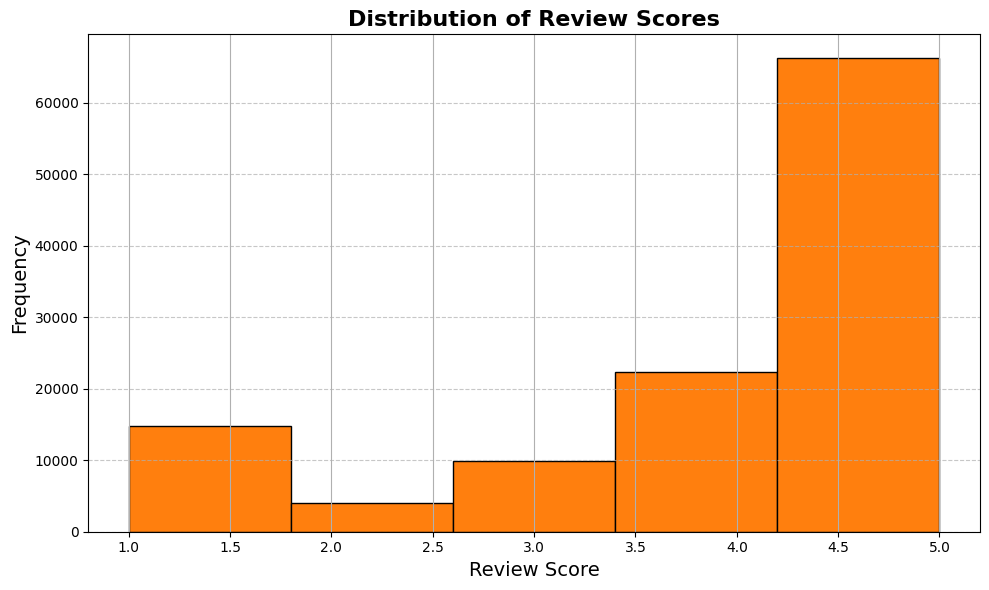

In [ ]:
plt.figure(figsize=(10, 6))

df['review_score'].hist(bins=5, color=colors[1], edgecolor='black')

plt.title('Distribution of Review Scores', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

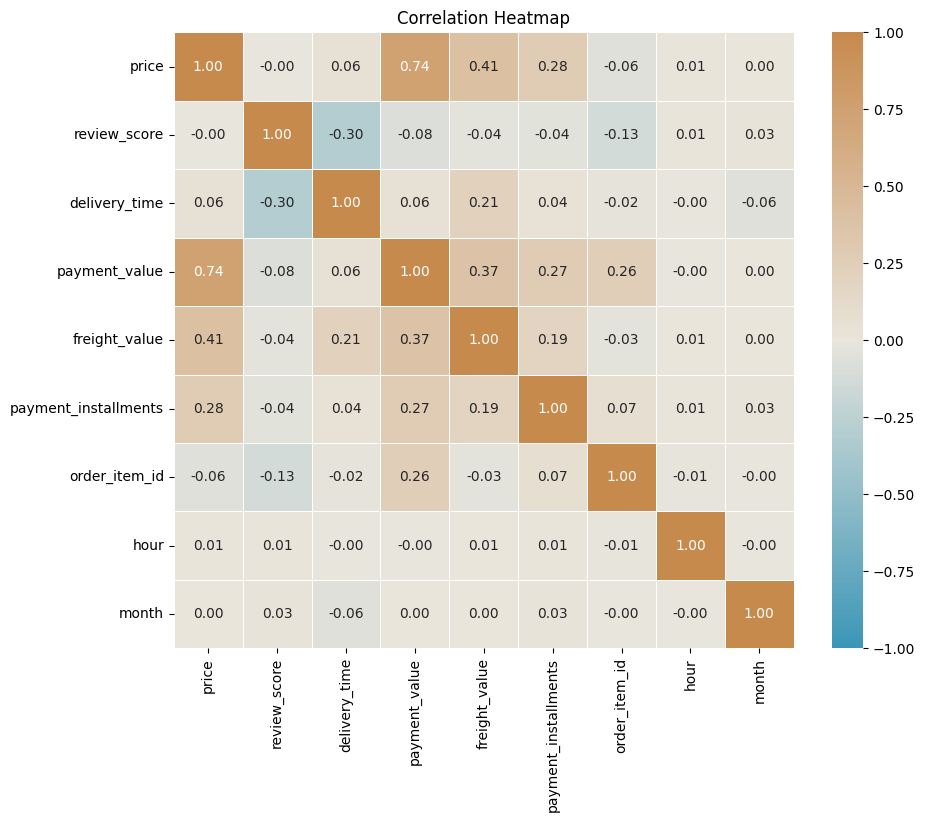

In [ ]:
# Import necessary libraries
import pandas as pd

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

df['hour'] = df['order_purchase_timestamp'].dt.hour
df['month'] = df['order_purchase_timestamp'].dt.month

correlation_features = df[['price', 'review_score', 'delivery_time',
                            'payment_value', 'freight_value',
                            'payment_installments', 'order_item_id',
                            'hour', 'month']]

correlation = correlation_features.corr()

custom_colors = ['#3B96B7', '#E9E5DC', '#C78A4D']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap=custom_cmap, vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Insight:**
- Mayoritas pelanggan memberikan ulasan positif (skor 4-5), namun waktu pengiriman yang lebih lama berhubungan dengan penurunan kepuasan pelanggan.
- Kartu kredit adalah metode pembayaran paling dominan (77.2%), diikuti oleh boleto (16.8%), sementara voucher dan debit card kurang diminati.
- Harga produk memiliki korelasi kuat dengan nilai pembayaran, menunjukkan bahwa harga memainkan peran signifikan dalam total transaksi.

## Conclusion
- pertanyaaan 1 : Cama Mesa Banho menjadi top product e commerce brazilian
- Pertanyaan 2 : Skor ulasan cenderung tinggi, dengan mayoritas pelanggan memberikan nilai 4 dan 5, meskipun waktu pengiriman yang lama dapat menurunkan kepuasan.
Harga produk memiliki korelasi positif dengan nilai pembayaran, menunjukkan pentingnya harga dalam keputusan transaksi.
Kartu kredit menjadi metode pembayaran paling dominan, sementara metode seperti voucher dan kartu debit jarang digunakan.

